<a href="https://colab.research.google.com/github/aabdulhakeem/MINIST_dif_models_study/blob/SIMPLE-ANN-MODEL-AND-SVM/MINIST_with_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import random
import time
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##0. Importing MINIST with shuffled data

In [2]:
X, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X.shape

(70000, 784)

In [3]:
X = X.reshape(-1, 28, 28)

In [4]:
X_images, y = sklearn.utils.shuffle(X, y, random_state=42)
X = X_images.reshape(-1, 784)

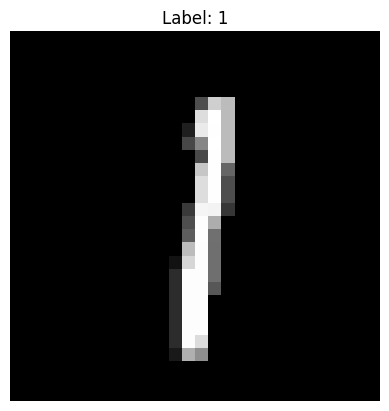

In [5]:
# choosing number of samples randomly
i = random.randint(0, len(X))
plt.imshow(X_images[i], cmap='gray')
plt.title(f"Label: {y[i]}")
plt.axis('off')
plt.show()

# 1-  SIMPLE ANN MODEL AND SVM AND APPLY THEM TO THE DATA independently

In [15]:
X_ann = X / 255.0
y_ann = to_categorical(y.astype(int), 10)

X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=50)

for epochs in [5, 10, 15, 20]:
    print(f"\nTraining model for {epochs} epochs...")

    ann_model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    ann_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    ann_model.summary()

    start_train_time = time.time()
    history = ann_model.fit(
        X_train_ann, y_train_ann,
        epochs=epochs,
        batch_size=128,
        validation_split=0.1,
        verbose=1
    )
    end_train_time = time.time()

    start_test_time = time.time()
    ann_loss, ann_acc = ann_model.evaluate(X_test_ann, y_test_ann)
    end_test_time = time.time()

    print("\nValidation Accuracy per Epoch:")
    for i in range(len(history.history['val_accuracy'])):
        print(f"Epoch {i+1}: {history.history['val_accuracy'][i]:.4f}")

    print(f"\nFinal ANN Test Accuracy: {ann_acc:.4f}")

    # Calculate average training time per epoch
    avg_train_time = (end_train_time - start_train_time) / epochs
    avg_test_time = (end_test_time - start_test_time)
    print(f"\nAverage Training Time per Epoch: {avg_train_time:.4f} seconds")
    print(f"Test Time: {avg_test_time:.4f} seconds")


Training model for 5 epochs...


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7726 - loss: 0.7524 - val_accuracy: 0.9463 - val_loss: 0.1826
Epoch 2/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9382 - loss: 0.2095 - val_accuracy: 0.9613 - val_loss: 0.1355
Epoch 3/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9505 - loss: 0.1572 - val_accuracy: 0.9695 - val_loss: 0.1084
Epoch 4/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9636 - loss: 0.1222 - val_accuracy: 0.9714 - val_loss: 0.0977
Epoch 5/5
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9659 - loss: 0.1117 - val_accuracy: 0.9736 - val_loss: 0.0921
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0891

Validation Accuracy per Epoch:
Epoch 1: 0.9463
Epoch 2: 0.9613
Epoch 3: 0.9695
Epoch 4: 0.9714
Epoch 5: 0.9736

Final ANN Test Accuracy: 0.9719

Average Training Time per Epoch: 4.8261 seconds
Test Time: 2.7354 seconds

Training model for 10 epochs...


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7722 - loss: 0.7735 - val_accuracy: 0.9489 - val_loss: 0.1862
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9357 - loss: 0.2183 - val_accuracy: 0.9604 - val_loss: 0.1396
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9526 - loss: 0.1556 - val_accuracy: 0.9682 - val_loss: 0.1141
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9624 - loss: 0.1249 - val_accuracy: 0.9668 - val_loss: 0.1087
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9674 - loss: 0.1067 - val_accuracy: 0.9723 - val_loss: 0.0954
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9709 - loss: 0.0902 - val_accuracy: 0.9725 - val_loss: 0.0937
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9720 - loss: 0.0893 - val_accuracy: 0.9755 - val_loss: 0.0864
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9761 - loss: 0.0754 - val_accuracy: 0.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7647 - loss: 0.7854 - val_accuracy: 0.9429 - val_loss: 0.1969
Epoch 2/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9350 - loss: 0.2141 - val_accuracy: 0.9595 - val_loss: 0.1387
Epoch 3/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9536 - loss: 0.1544 - val_accuracy: 0.9655 - val_loss: 0.1198
Epoch 4/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9603 - loss: 0.1287 - val_accuracy: 0.9718 - val_loss: 0.1031
Epoch 5/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9668 - loss: 0.1079 - val_accuracy: 0.9711 - val_loss: 0.1026
Epoch 6/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9695 - loss: 0.0966 - val_accuracy: 0.9750 - val_loss: 0.0917
Epoch 7/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9728 - loss: 0.0860 - val_accuracy: 0.9748 - val_loss: 0.0928
Epoch 8/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9770 - loss: 0.0738 - val_accuracy: 0

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7358 - loss: 0.8472 - val_accuracy: 0.9482 - val_loss: 0.1846
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9380 - loss: 0.2098 - val_accuracy: 0.9600 - val_loss: 0.1360
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9519 - loss: 0.1564 - val_accuracy: 0.9666 - val_loss: 0.1153
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9605 - loss: 0.1279 - val_accuracy: 0.9696 - val_loss: 0.1075
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9665 - loss: 0.1114 - val_accuracy: 0.9734 - val_loss: 0.0929
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9700 - loss: 0.0952 - val_accuracy: 0.9734 - val_loss: 0.0916
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9725 - loss: 0.0860 - val_accuracy: 0.9752 - val_loss: 0.0859
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9761 - loss: 0.0770 - val_accuracy

**Key Results**:
- **5 Epochs**: 97.19% Accuracy | 4.8261s Train Time/Epoch | 2.7354s Test Time
- **10 Epochs**: 97.37% Accuracy | 4.4655s Train Time/Epoch | 2.0763s Test Time
- **15 Epochs**: 97.68% Accuracy | 5.3001s Train Time/Epoch | 2.0949s Test Time
- **20 Epochs**: 97.74% Accuracy | 4.3112s Train Time/Epoch | 1.4609s Test Time

**Best Model**:
- **20 Epochs**: While the improvement in accuracy is marginal (from 97.68% to 97.74%), this model provides the best result with **slightly higher accuracy**.
- **Reason**: 20 epochs offers the best balance, as accuracy improvement becomes minimal after this point and low in avg time per epoch.

---

**Observations**:
- Accuracy improves as the number of epochs increases, but the gains diminish after 10 epochs.
- The best model choice should depend on balancing **accuracy** and **training time**. While 20 epochs gives the highest accuracy, and good time.

In [9]:
print("\n--- Model Summary ---")
print(f"Number of Parameters: {ann_model.count_params()}")
print(f"Layers:")
for layer in ann_model.layers:
    print(f"- {layer.__class__.__name__}: Activation = {layer.activation.__name__ if hasattr(layer, 'activation') else 'N/A'}")
print(f"Optimizer: Adam")
print(f"Learning Rate: {optimizer.learning_rate.numpy()}")
print(f"Dropout used after first Dense layer with rate = 0.3")


--- Model Summary ---
Number of Parameters: 109386
Layers:
- Dense: Activation = relu
- Dropout: Activation = N/A
- Dense: Activation = relu
- Dense: Activation = softmax
Optimizer: Adam
Learning Rate: 0.0010000000474974513
Dropout used after first Dense layer with rate = 0.3


In [10]:
X_svm, _, y_svm, _ = train_test_split(X, y, train_size=7000, stratify=y, random_state=42)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm)
svm_acc = accuracy_score(y_test_svm, y_pred_svm)
print(f"\nSVM Test Accuracy: {svm_acc:.4f}")


SVM Test Accuracy: 0.8993
